In [1]:
import os
if not os.path.isdir('database'):
    os.chdir("..")

In [2]:
import pandas as pd

from utils import technical

In [3]:
currency_pair = "eurusd"
df = pd.read_pickle(f"database/{currency_pair}.pkl")

In [4]:
df.close.plot()

### Moving average

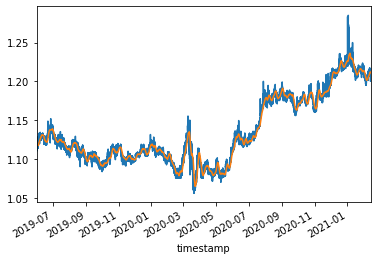

In [5]:
df.close.plot()
df.close.rolling(5000).mean().plot()

### MACD example
With getgains=True returns the percentage gains

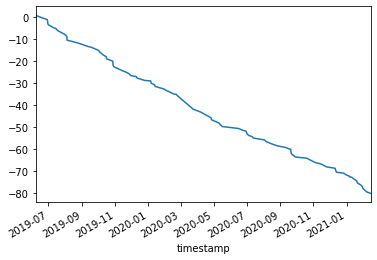

In [6]:
# there are duplicate indexes
df = df.drop(df[df.index.duplicated()].index)
technical.macd(df.close, 10000, 1000, getgains=True, commissions=0.005).cumsum().plot()

### Ultimate oscillator

Ultimate is good, but is also very sensitive and the commissions play a strong role

This simulation may take a while.


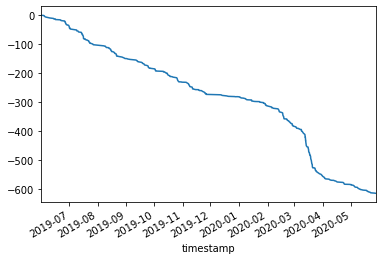

In [7]:
technical.ultimate(df.close, df.low, df.high, buylevel=30, selllevel=70, days=7, getgains=True, commissions=0.005, mingain=0.005, firstopportunity=True, stoploss=0.005).cumsum().plot()

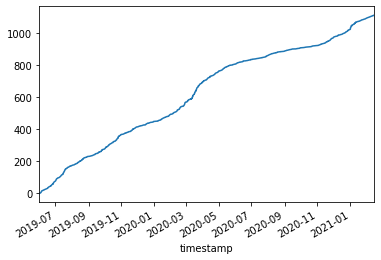

In [24]:
technical.ultimate(df.close, df.low, df.high, buylevel=30, selllevel=70, days=7, getgains=True, commissions=0).cumsum().plot()

In [9]:
technical.ultimate(df.close, df.low, df.high, buylevel=30, selllevel=70, days=7, winning=True, commissions=0)

1101.0417456962393

Test hourly ticket

In [17]:
df_hour_ticket = df.close.iloc[::60]
df_hour_high = df.high.rolling(60).max().iloc[::60]
df_hour_low = df.high.rolling(60).min().iloc[::60]

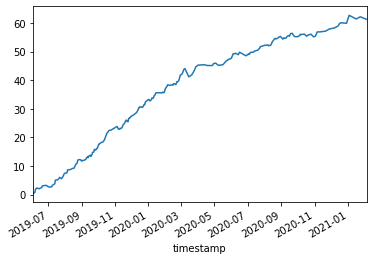

In [25]:
technical.ultimate(df_hour_ticket, df_hour_low, df_hour_high, buylevel=30, selllevel=70, days=7, getgains=True, commissions=0).cumsum().plot()

In [15]:
ultpolicy = technical.ultimate(df.close, df.low, df.high, buylevel=30, selllevel=70, days=7, strategy=True, commissions=0)

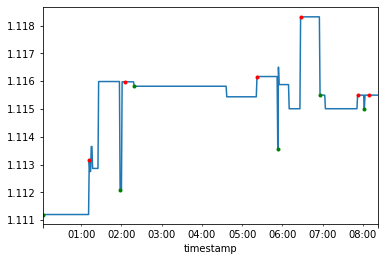

In [16]:
plottable = df.close.iloc[:500]
plottable.plot()
plottable[ultpolicy].iloc[::2].plot(style=".", c="g")
plottable[ultpolicy].iloc[1::2].plot(style=".", c="r")

### Bollinger bands

In [ ]:
df.close.plot()
lower, upper = technical.bollinger_bands(df.close, k=3, period=100000)
lower.plot()
upper.plot()

In [ ]:
technical.bollinger_bands(df.close, k=1, period=1000, getgains=True, commissions=0).cumsum().plot()

### Williams %R

In [ ]:
technical.williams(df.close, df.low, df.high, buylevel=-80, selllevel=-20, days=10, getgains=True, commissions=0).cumsum().plot()

### Momentum

In [ ]:
technical.momentum(df.close, period=10, getgains=True, commissions=0).cumsum().plot()

### Policy combination example

In [ ]:
macd = technical.macd(df.close, 10000, 1000)
lower, upper = technical.bollinger_bands(df.close, k=1, period=1000)
buy = (macd > 0) & (df.close < lower)
sell = (macd < 0) & (df.close > upper)
policy = technical.getpolicy(buy, sell, prices=df.close)
technical.gains(prices=df.close, policy=policy).cumsum().plot()